# MNIST Dataset with ANN Project📈📉✍︎

This project is using [MNIST Dataset](https://www.kaggle.com/datasets/hojjatk/mnist-dataset).
### MNIST Dataset description:

> The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. .

In this notebook I am going to load and explore the MNIST data, put the images into batches, define an ANN model using MLP (Multilayer Perceptron) class, train the model and finally evaluate it in the following specific steps:

0. Make imports
1. Load and examine the MNIST data
2. Define the model
3. Train the model
4. Evaluate the model (use test data)

## 0. Make imports

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F          # adds some efficiency
from torch.utils.data import DataLoader  # lets us load data in batches
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix  # for evaluating results
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load and examine the MNIST data

### 1.1 Define transform

In [2]:
# before loading the dataset I am going to define transform in order to transform images to tensors

transform = transforms.ToTensor()

### 1.2 Load the MNIST dataset

In [3]:
# Training set
train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)
train_data

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../Data/MNIST/raw/train-images-idx3-ubyte.gz to ../Data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../Data/MNIST/raw/train-labels-idx1-ubyte.gz to ../Data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../Data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../Data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../Data/MNIST/raw



/Users/aga/opt/miniconda3/envs/pytorchenv/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
# Test set
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

### 1.3 Examin the training set

In [8]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
type(train_data[0])

tuple

In [10]:
train_data[0][1]

5

In [15]:
train_data[0][0].size()

torch.Size([1, 28, 28])

### 1.4 View the image

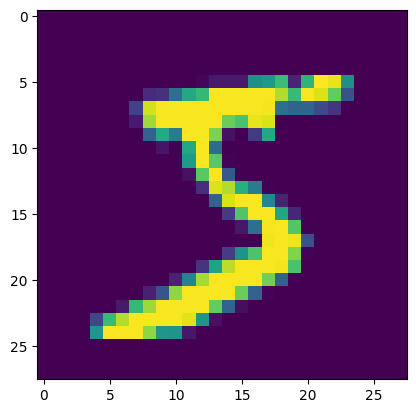

In [11]:
plt.imshow(train_data[0][0].reshape((28,28)));

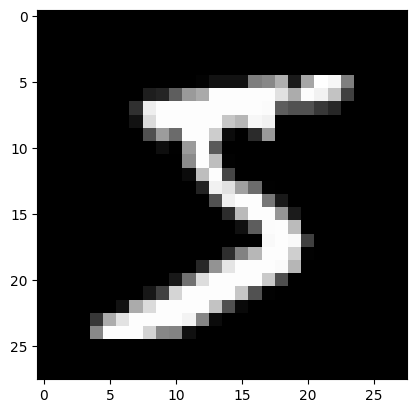

In [16]:
plt.imshow(train_data[0][0].reshape((28,28)), cmap="gray");

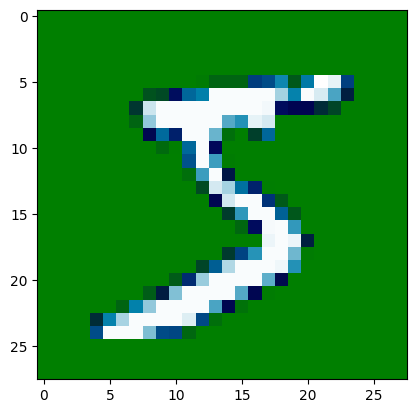

In [17]:
plt.imshow(train_data[0][0].reshape((28,28)), cmap="ocean");

### 1.5 Put images into batches

In [18]:
torch.manual_seed(24)  # for consistent results

train_loader = DataLoader(train_data, batch_size=200, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

Labels:  [7 7 0 6 9 6 1 5 7 4 9 8 7 7 6 1 1 5 8 2]


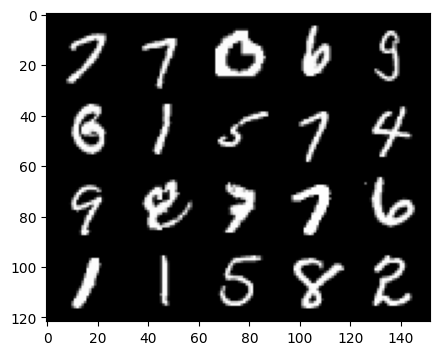

In [20]:
# First batch 
for images,labels in train_loader: 
    break

# Print the first 20 labels
print('Labels: ', labels[:20].numpy())

# Print the first 20 images
im = make_grid(images[:20], nrow=5)
plt.figure(figsize=(10,4))
# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

## 2. Define the model

## 2.1 Define the MLP class

I will be using **fully connected layers** to develop a **multilayer perceptron(MLP)**.
Input size is 28*28= **784**
Out size is **10** (10 possible outcomes).
I will set my hiddel layers to **120 and 84** and going to experiment with it later.


In [55]:
class MLP(nn.Module):
    def __init__(self, in_sz=784, out_sz=10, layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
    
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [56]:
torch.manual_seed(24)
model = MLP()
model

MLP(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

## 2.2 Count the model parameters

In [57]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

In [58]:
count_parameters(model)

 94080
   120
 10080
    84
   840
    10
______
105214


## 2.3 Define the loss function and optimizer

In [59]:
loss_fun = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## 2.4 Flatten the training data

In [60]:
# Load the first batch, print its shape
for images, labels in train_loader:
    print('Batch shape:', images.size())
    break

Batch shape: torch.Size([200, 1, 28, 28])


In [61]:
images.view(200,-1).size()

torch.Size([200, 784])

# 3. Train the model

## 3.1 Train

In [62]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(200, -1))  # Here we flatten X_train
        loss = loss_fun(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%400 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{400*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*200/(200*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = loss_fun(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed        


Duration: 87 seconds


## 3.2 Plot the loss and accuracy comparisons

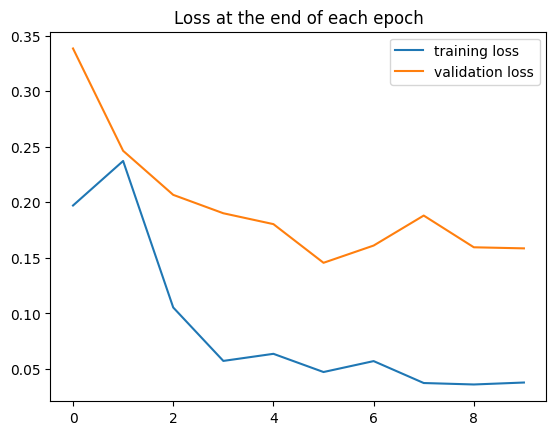

In [64]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

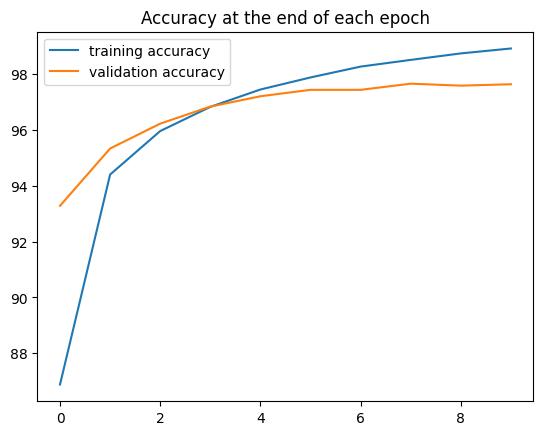

In [65]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

# 4.Evaluate the model (use test data)

## 4.1 Show the test scores

In [66]:
print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(9328), tensor(9533), tensor(9622), tensor(9683), tensor(9720), tensor(9743), tensor(9743), tensor(9765), tensor(9758), tensor(9763)]

Test accuracy: 97.630%


In [67]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [68]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9763/10000 =  97.630%


## 4.2 Display the confusion matrix

In [70]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 968    0    5    0    3    4    6    1    6    3]
 [   0 1124    1    0    1    0    3    4    0    2]
 [   1    3 1007    8    2    1    1    8    5    0]
 [   2    0    2  990    0   14    1    1    3    7]
 [   0    0    4    0  945    3    1    0    3    4]
 [   0    1    0    0    0  853    3    0    2    2]
 [   4    4    4    0    9    6  941    0    2    0]
 [   1    0    3    5    4    1    0 1005    4    4]
 [   2    3    5    6    4    8    2    2  946    3]
 [   2    0    1    1   14    2    0    7    3  984]]


## 4.3 Examine the misses

In [71]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')
        
# Display the number of misses
len(misses)

237

In [72]:
# Display the first 10 index positions
misses[:10]

array([  61,  115,  247,  259,  321,  381,  445,  447,  448,  495])

In [73]:
# Set up an iterator to feed batched rows
r = 12   # row size
row = iter(np.array_split(misses,len(misses)//r+1))

Index: [  61  115  247  259  321  381  445  447  448  495  582  619]
Label: [   8    4    4    6    2    3    6    4    9    8    8    1]
Guess: [   2    9    6    0    7    7    0    9    8    2    2    8]


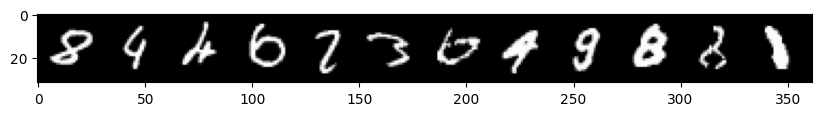

In [74]:
nextrow = next(row)
print("Index:", nextrow)
print("Label:", y_test.index_select(0,torch.tensor(nextrow)).numpy())
print("Guess:", predicted.index_select(0,torch.tensor(nextrow)).numpy())

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));